# Лабораторна робота №7
## Тема: Структури даних дерево, купа, геш-таблиця
### Виконала: Бояринцова Поліна
### Група: КН-24-1
### Дата: 12.04.2025

## 1. Реалізація дерев за допомогою списків

In [1]:
myTree = ['a', ['b', ['d',[],[]], ['e',[],[]] ], ['c', ['f',[],[]], []] ]
print(myTree)
print('left subtree = ', myTree[1])
print('root = ', myTree[0])
print('right subtree = ', myTree[2])
print(myTree[1][2][0])

['a', ['b', ['d', [], []], ['e', [], []]], ['c', ['f', [], []], []]]
left subtree =  ['b', ['d', [], []], ['e', [], []]]
root =  a
right subtree =  ['c', ['f', [], []], []]
e


In [2]:
# Задання вузла бінарного дерева
def BinaryTree(r):
    return [r, [], []]

# Додавання елемента у ліве піддерево
def insertLeft(root, newBranch):
    t = root.pop(1)
    if len(t) > 1:
        root.insert(1, [newBranch, t, []])
    else:
        root.insert(1, [newBranch, [], []])
    return root

# Додавання елемента у праве піддерево
def insertRight(root, newBranch):
    t = root.pop(2)
    if len(t) > 1:
        root.insert(2, [newBranch, [], t])
    else:
        root.insert(2, [newBranch, [], []])
    return root

# Повернути значення кореневого елемента
def getRootVal(root):
    return root[0]

# Присвоєння нового значення кореневому елементу
def setRootVal(root, newVal):
    root[0] = newVal

# Повернути ліве піддерево
def getLeftChild(root):
    return root[1]

# Повернути праве піддерево
def getRightChild(root):
    return root[2]


In [3]:
# Приклад
r = BinaryTree(3)
insertLeft(r,4)
insertLeft(r,5)
insertRight(r,6)
insertRight(r,7)
l = getLeftChild(r)
print(l)
setRootVal(l,9)
print(r)
insertLeft(l,11)
print(r)
print(getRightChild(getRightChild(r)))

[5, [4, [], []], []]
[3, [9, [4, [], []], []], [7, [], [6, [], []]]]
[3, [9, [11, [4, [], []], []], []], [7, [], [6, [], []]]]
[6, [], []]


### 1.2. Створення бінарного дерева та операції з ним:

In [4]:
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.value = key

class BinarySearchTree:
    def __init__(self):
        self.root = None
    
    def insert(self, root, key):
        if root is None:
            return Node(key)
        if key < root.value:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)
        return root
    
    def search(self, root, key):
        if root is None or root.value == key:
            return root
        if key < root.value:
            return self.search(root.left, key)
        return self.search(root.right, key)
    
    def delete(self, root, key):
        if root is None:
            return root
        if key < root.value:
            root.left = self.delete(root.left, key)
        elif key > root.value:
            root.right = self.delete(root.right, key)
        else:
            if root.left is None:
                return root.right
            elif root.right is None:
                return root.left
            min_node = self._min_value_node(root.right)
            root.value = min_node.value
            root.right = self.delete(root.right, min_node.value)
        return root
    
    def _min_value_node(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current

### 1.3. Асимптотична складність.

| Операція | В середньому | Найгірший випадок |
|----------|---------------|--------------------|
| Search   | Θ(n)          | O(n)               |
| Insert   | Θ(log n)      | O(n)               |
| Delete   | Θ(log n)      | O(n)               |

## 2. Декілька простих функцій Python для роботи з купами

In [5]:
global heap
global currSize
def parent(i): #Отримати індекс батьківського вузла для i-го елемента
 return i // 2
def left(i): #Отримати лівий дочірній елемент от i-го
 return 2*i
def right(i): #Отримати правий дочірній елемент от i-го
 return (2*i + 1)

### 2.1. Додавання елемента до наявної купи

In [6]:
def swap(a, b): # міняемо елемент з індексом a на елемент з індексом b
 temp = heap[a]
 heap[a] = heap[b]
 heap[b] = temp
def insert(elem):
 global currSize

 index = len(heap)
 heap.append(elem)
 currSize += 1
 par = parent(index)
 flag = 0
 while flag != 1:
     if index == 1: #Дійшли до кореневого елемента
         flag = 1
     elif heap[par] > elem: #Якщо індекс кореневого елемента більше індекса
# нашего елемента – наш елемент на своєму місці
         flag = 1
     else: #Міняємо місцями батьківський елемент з нашим
         swap(par, index)
         index = par
         par = parent(index)

 print(heap)

### 2.2. Вилучення максимального елемента купи

In [7]:
def extractMax():
 global currSize
 if currSize != 0:
     maxElem = heap[1]
     heap[1] = heap[currSize] # Замінюємо кореневий елемент – останнім
     heap.pop(currSize) # Видаляємо останній елемент
     currSize -= 1 # Зменшуємо розмір купи
     maxHeapify(1)
 return maxElem
def maxHeapify(index):
 global currSize

 lar = index
 l = left(index)
 r = right(index)
 # Обчислюємо, який із дочірніх елементів більше; якщо він більше батьківського - міняємо місцями
 if l <= currSize and heap[l] > heap[lar]:
     lar = l
 if r <= currSize and heap[r] > heap[lar]:
     lar = r
 if lar != index:
    swap(index, lar)
    maxHeapify(lar)

### 2.3. Генерація купи з випадкового масиву (С.р.) :

In [8]:
import random

def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[left] > arr[largest]:
        largest = left
    if right < n and arr[right] > arr[largest]:
        largest = right
    
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def build_heap(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

# Генерація масиву
arr = [random.randint(1, 100) for _ in range(10)]
print("Original array:", arr)

build_heap(arr)
print("Heapified array:", arr)

Original array: [47, 53, 20, 70, 20, 11, 93, 98, 82, 85]
Heapified array: [98, 85, 93, 82, 47, 11, 20, 70, 53, 20]


### 2.4. Додавання елемента

In [9]:
def insert_heap(arr, key):
    arr.append(key)
    i = len(arr) - 1
    while i > 0 and arr[(i - 1) // 2] < arr[i]:
        arr[i], arr[(i - 1) // 2] = arr[(i - 1) // 2], arr[i]
        i = (i - 1) // 2

# Додавання елемента 3
insert_heap(arr, 3)
print("Heap after inserting 3:", arr)

Heap after inserting 3: [98, 85, 93, 82, 47, 11, 20, 70, 53, 20, 3]


### 2.5. Видалення максимального елемента

In [10]:
def delete_max(arr):
    n = len(arr)
    if n == 0:
        return None
    arr[0], arr[-1] = arr[-1], arr[0]
    max_val = arr.pop()
    heapify(arr, len(arr), 0)
    return max_val

# Приклад масиву (купу)
arr = [9, 7, 5, 3, 6, 4, 1]

# Викликаємо функцію для видалення максимального елемента
max_val = delete_max(arr)

# Виводимо максимальний елемент та залишкову купу
print("Максимальний елемент, вилучений з купи:", max_val)
print("Купа після вилучення максимального елемента:", arr)


Максимальний елемент, вилучений з купи: 9
Купа після вилучення максимального елемента: [7, 6, 5, 3, 1, 4]


### 2.6. Асимптотична складність

| Операція | Середній випадок | Найгірший випадок | Пояснення |
|----------|------------------|-------------------|-----------|
| `search` | O(n)             | O(n)              | Потрібно переглянути всі вузли |
| `insert` | O(log n)         | O(log n)          | Додавання + "підіймання вгору" (`heapify-up`) |
| `delete` (корінь) | O(log n) | O(log n)          | Заміна кореня + "просіювання вниз" (`heapify-down`) |

## 3. Реалізація геш-таблиці в Python

In [11]:
class HashTable:
    def __init__(self, size=10):
        self.size = size
        self.table = [[] for _ in range(size)]
    
    def _hash(self, key):
        return hash(key) % self.size
    
    def insert(self, key, value):
        index = self._hash(key)
        self.table[index].append((key, value))
    
    def search(self, key):
        index = self._hash(key)
        for k, v in self.table[index]:
            if k == key:
                return v
        return None
    
    def delete(self, key):
        index = self._hash(key)
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                del self.table[index][i]
                return True
        return False

### 3.1. Тестування з різними типами даних

In [12]:
# Приклад використання
ht = HashTable()
ht.insert(1, "one")
ht.insert("apple", "fruit")
ht.insert(tuple([1, 2, 3]), "list")  # Використовуємо кортеж замість списку

print(ht.search(1))  # "one"
print(ht.search("apple"))  # "fruit"
print(ht.search(tuple([1, 2, 3])))  # "list"

one
fruit
list


### 3.2. Вимірювання часу виконання

In [13]:
import time

# Тестування часу вставки
start = time.time()
for i in range(1000):
    ht.insert(i, i)
print("Insertion time:", time.time() - start)

# Тестування часу пошуку
start = time.time()
for i in range(1000):
    ht.search(i)
print("Search time:", time.time() - start)

# Тестування часу видалення
start = time.time()
for i in range(1000):
    ht.delete(i)
print("Deletion time:", time.time() - start)

Insertion time: 0.0009984970092773438
Search time: 0.003996610641479492
Deletion time: 0.0010006427764892578


### 3.3. Графік порівняння різних типів даних (треба скоротити код(не писати частини коду та методи, що вже були написані в звіті, а використовувати ті))

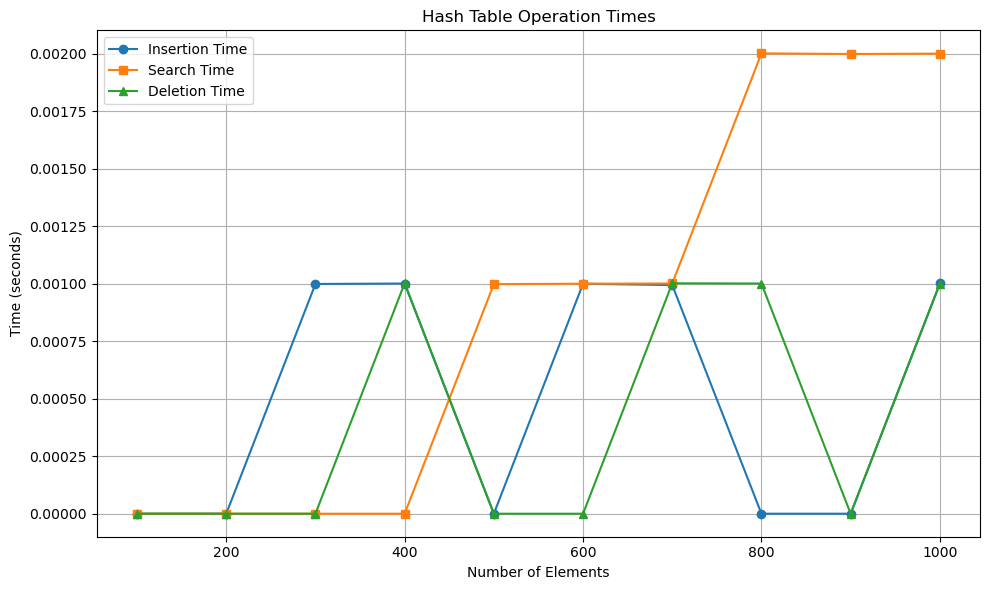

In [15]:
import time
import matplotlib.pyplot as plt

# Для тестування часу вставки, пошуку та видалення
insertion_times = []
search_times = []
deletion_times = []

# Тестування для різних кількостей елементів
for n in range(100, 1001, 100):
    ht = HashTable()

    # Вставка
    start = time.time()
    for i in range(n):
        ht.insert(i, i)
    insertion_times.append(time.time() - start)

    # Пошук
    start = time.time()
    for i in range(n):
        ht.search(i)
    search_times.append(time.time() - start)

    # Видалення
    start = time.time()
    for i in range(n):
        ht.delete(i)
    deletion_times.append(time.time() - start)

# Побудова графіку
x = list(range(100, 1001, 100))

plt.figure(figsize=(10, 6))
plt.plot(x, insertion_times, label="Insertion Time", marker='o')
plt.plot(x, search_times, label="Search Time", marker='s')
plt.plot(x, deletion_times, label="Deletion Time", marker='^')

plt.xlabel("Number of Elements")
plt.ylabel("Time (seconds)")
plt.title("Hash Table Operation Times")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 3. Контрольні питання

### 1. Чим відрізняється структура *бінарне дерево* від *бінарного дерева пошуку*?

- **Бінарне дерево** — це дерево, в якому кожен вузол має не більше двох нащадків. Воно не обмежує порядок елементів.
- **Бінарне дерево пошуку (BST)** — це спеціалізоване бінарне дерево, в якому для кожного вузла виконується умова: значення лівих нащадків менші за значення батьківського вузла, а значення правих нащадків більші. Це дозволяє здійснювати швидкий пошук, вставку та видалення елементів.

### 2. Чим відрізняється структура бінарне дерево від бінарної купи?

- **Бінарне дерево** не має обмежень на порядок елементів (крім властивості бінарного дерева пошуку), ієрархічне розташування елементів може бути будь-яким.
- **Бінарна купа (heap)** — це спеціалізоване бінарне дерево, яке має додаткову властивість: для *max-heap* значення у вузлі *більше або рівні* значенням їхніх нащадків, а для min-heap — навпаки, значення у вузлі *менше або рівні* значенням їхніх нащадків. Купа використовується для ефективної реалізації черги з пріоритетами.

### 3. Які існують типи дерев? Опишіть їхні основні характеристики та переваги.

- *Бінарне дерево пошуку (BST):* Час пошуку, вставки та видалення — O(log n) в середньому випадку. Головна перевага — швидкий пошук та обробка даних.
- *Червоні-чорні дерева:* Самобалансуючі бінарні дерева пошуку. Час операцій — O(log n). Використовуються, коли важливо підтримувати баланс дерева.
- *AVL-дерева:* Самобалансуючі бінарні дерева пошуку з додатковою умовою, що різниця висот лівого та правого піддерев не може перевищувати 1. Час операцій — O(log n).
- *B-дерева:* Багатоелементні самобалансуючі дерева, що використовуються для зберігання великих обсягів даних, наприклад, у файлових системах та базах даних.
- *Trie:* Дерево для зберігання набору рядків, часто використовується для ефективного пошуку в словниках чи автозавершення.
- *Купи (heap):* Дерево, що підтримує властивість черги з пріоритетами. Використовується для реалізації алгоритмів типу Дейкстри, Хаффмана тощо.

### 4. Наведіть приклади задач, які ефективно вирішуються за допомогою дерев.

- Пошук у впорядкованих наборах даних (наприклад, у бінарному дереві пошуку).
- Організація та зберігання словників (за допомогою Trie).
- Алгоритми на графах, такі як пошук найкоротшого шляху (наприклад, через використання бінарної купи).
- Балансування даних для швидкого пошуку та вставки (наприклад, через червоно-чорні або AVL-дерева).

### 5. Як організована купа? Опишіть алгоритми додавання та вилучення елементів з купи.

**Організація:**
    1. Зберігається як масив.
    2. Лівий нащадок:  ```2i + 1```, правий: ```2i + 2```, батько: ```(i - 1) // 2```.
    
**Додавання (```insert```):**

    - Додаємо новий елемент в кінець масиву.
    - «Просіваємо вгору» (переміщуємо вгору, поки не виконується умова купи).
    
**Вилучення максимуму (```extract_max```):**

    - Замінюємо корінь останнім елементом.
    - Видаляємо останній елемент.
    - «Просіваємо вниз» (переміщуємо новий корінь на відповідне місце).

### 6. Які задачі можна ефективно вирішити за допомогою купи? Наведіть приклади.

- Черга з пріоритетами: Купа є ідеальним вибором для реалізації черги з пріоритетами, де елементи з вищим пріоритетом обробляються першими.
- Алгоритм Дейкстри: Для пошуку найкоротших шляхів на графах з використанням черги з пріоритетами.
- Алгоритм Хаффмана: Для побудови оптимального кодування в стисненні даних.
- Злиття кількох відсортованих списків: Купа дозволяє ефективно об’єднати кілька відсортованих списків.

### 7. Як геш-функція використовується для зберігання та пошуку даних в хеш-таблиці?

1. **Геш-функція** перетворює ключ (наприклад, рядок або число) у **індекс масиву**:

    ```index = hash(key) % size```

2. Елемент зберігається у хеш-таблиці за отриманим індексом.

3. Для пошуку — знову обчислюється індекс за ключем, і зчитується значення з відповідної комірки:

    ```value = table[hash(key) % size]```

>  Це дозволяє здійснювати **вставку, пошук і видалення** елементів в **середньому за `O(1)`** часу.
>
>  Але при **колізіях** (коли різні ключі дають однаковий індекс) ефективність може знижуватися — для цього застосовують **методи вирішення колізій** (див. пункт 8).


### 8. Опишіть методи вирішення колізій в хеш-таблицях. Які їхні переваги та недоліки?

| Метод                   | Опис                                                                | Переваги                                         | Недоліки                                       |
|------------------------|---------------------------------------------------------------------|--------------------------------------------------|------------------------------------------------|
| **Зчеплення (chaining)** | У кожній комірці зберігається список зіткнувшихся елементів        | Простота реалізації, ефективність при розширенні | Використовує додаткову пам’ять (списки)        |
| **Відкрите хешування**   | При колізії шукається нова вільна позиція у масиві                  | Працює без додаткових структур                    | Може виникнути **кластеризація** (групування)  |

>  *Види відкритого хешування:*
> - **Лінійне пробування** — перевірка наступних індексів.
> - **Квадратичне пробування** — `i²` кроки.
> - **Двійне хешування** — інша геш-функція для кроку.